In [2]:
# machine learning model to predict diabetes using pima indians dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pickle

In [3]:
# create dataframe
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Dataset size: ",df.shape)

Dataset size:  (768, 9)


In [5]:
# check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# print the diabaetes and non-diabates count
print(df['Outcome'].value_counts())


0    500
1    268
Name: Outcome, dtype: int64


In [7]:
# check for duplicate values
df.duplicated().sum()

0

In [8]:
# Checking min, max, mean, count, std deviation etc
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


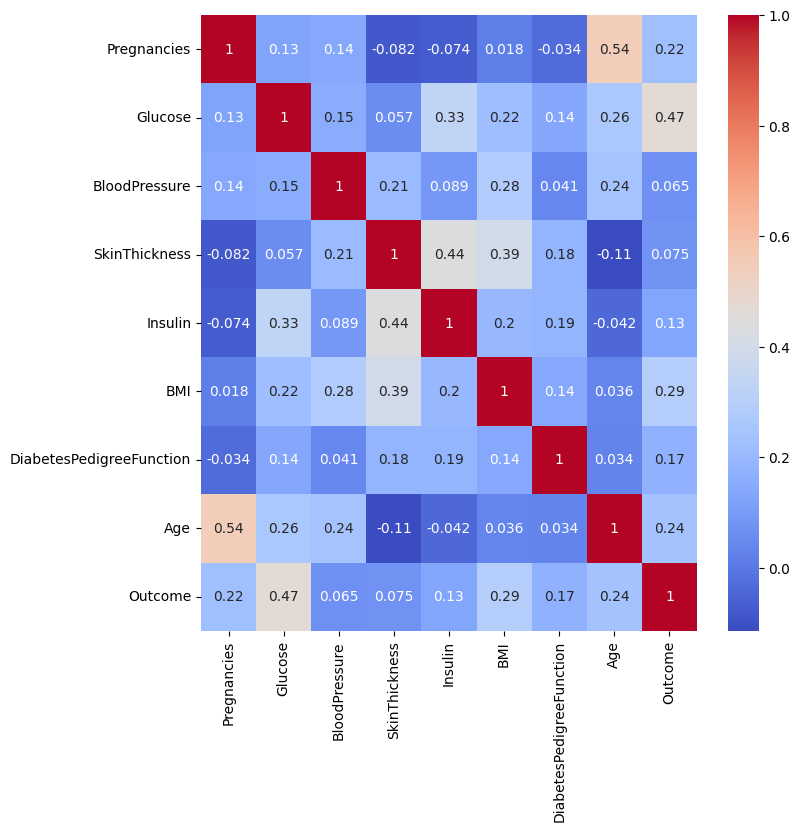

In [9]:
# EDA
# check for correlation
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [10]:
# drop age column
df.drop('Age', axis=1, inplace=True)

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)


In [12]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [14]:
# Model building using Gradient Boosting
gbc = GradientBoostingRegressor()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc.round())
print("Accuracy for Gradient Boosting:", accuracy_gbc)

Accuracy for Gradient Boosting: 0.7467532467532467


In [15]:
# model building using gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor()
gbc.fit(X_train, y_train)

GradientBoostingRegressor()

In [16]:
# predict the model
y_pred = gbc.predict(X_test)
# print accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())
print("accuracy score is: ",accuracy_score(y_test, y_pred.round()))

accuracy score is:  0.7532467532467533


In [17]:
# Model building using XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb.round())
print("Accuracy for XGBoost:", accuracy_xgb)

Accuracy for XGBoost: 0.7077922077922078


In [18]:
# model building using xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# predict the model
y_pred = xgb.predict(X_test)
# print accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())
print("accuracy score is: ",accuracy_score(y_test, y_pred.round()))


accuracy score is:  0.7077922077922078


In [20]:
# Model building using LightGBM
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb.round())
print("Accuracy for LightGBM:", accuracy_lgb)

Accuracy for LightGBM: 0.7207792207792207


In [21]:
# model building using lightgbm
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)


LGBMRegressor()

In [22]:
# predict the model
y_pred = lgb.predict(X_test)
# print accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())
print("accuracy score is: ",accuracy_score(y_test, y_pred.round()))

accuracy score is:  0.7207792207792207


In [23]:
# Model building using Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb.round())
print("Accuracy for Naive Bayes:", accuracy_nb)

Accuracy for Naive Bayes: 0.7857142857142857


In [24]:
# model building using naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [25]:
# predict the model
y_pred = nb.predict(X_test)
# print accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())
print("accuracy score is: ",accuracy_score(y_test, y_pred.round()))

accuracy score is:  0.7857142857142857


In [26]:
# model building using SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)





SVC()

In [27]:
# predict the model
y_pred = svc.predict(X_test)
# print accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())
print("accuracy score is: ",accuracy_score(y_test, y_pred.round()))


accuracy score is:  0.7532467532467533


In [28]:

# Create a dictionary to store model names and their corresponding accuracies
model_accuracies = {
    "Random Forest": None,
    "Gradient Boosting": None,
    "XGBoost": None,
    "LightGBM": None,
    "Naive Bayes": None,
    "SVC" : None
}

# Train and evaluate each model
models = {
    "Random Forest": RandomForestRegressor(n_estimators=20),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Naive Bayes": GaussianNB(),
    "SVC" : SVC()
}

for model_name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred.round())
    model_accuracies[model_name] = accuracy

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])

# Display the comparison table
print(accuracy_df)

                   Accuracy
Random Forest      0.733766
Gradient Boosting  0.733766
XGBoost            0.707792
LightGBM           0.720779
Naive Bayes        0.785714
SVC                0.753247


In [29]:
model_accuracies = {
    "Gradient Boosting": accuracy_gbc,
    "XGBoost": accuracy_xgb,
    "LightGBM": accuracy_lgb,
    "Naive Bayes": accuracy_nb
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])

# Display the comparison table
print(accuracy_df)

                   Accuracy
Gradient Boosting  0.746753
XGBoost            0.707792
LightGBM           0.720779
Naive Bayes        0.785714


In [ ]:
# save naive bayes model as pickle file
import pickle
pickle.dump(nb, open('diab.pkl','wb'))
